In [3]:
import pandas as pd
import pickle
import numpy as np
!pip install scikit-learn==1.2.2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Hack4soc

/content/drive/MyDrive/Hack4soc


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Hack4soc/cleaned_dataset.csv')

In [7]:
df.head()

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Bajra,Summer,Karnataka,820.0,662,1266.7,78039.40,254.20,0.810000
1,Black pepper,Kharif,Karnataka,3825.0,924,1266.7,364025.25,1185.75,0.437500
2,Cardamom,Whole Year,Karnataka,21230.0,1214,1266.7,2020459.10,6581.30,0.058571
3,Coriander,Whole Year,Karnataka,17317.0,2853,1266.7,1648058.89,5368.27,0.121333
4,Dry chillies,Rabi,Karnataka,4565.0,7895,1266.7,434451.05,1415.15,1.869444


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             2244 non-null   object 
 1   Season           2244 non-null   object 
 2   State            2244 non-null   object 
 3   Area             2244 non-null   float64
 4   Production       2244 non-null   int64  
 5   Annual_Rainfall  2244 non-null   float64
 6   Fertilizer       2244 non-null   float64
 7   Pesticide        2244 non-null   float64
 8   Yield            2244 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 157.9+ KB


In [9]:
df['Season'].unique()

array(['Summer     ', 'Kharif     ', 'Whole Year ', 'Rabi       ',
       'Autumn     ', 'Winter     '], dtype=object)

In [10]:
df['Season'] = df['Season'].replace({
    'Whole Year ': 'Whole Year',
    'Kharif     ': 'Kharif',
    'Rabi       ': 'Rabi',
    'Autumn     ': 'Autumn',
    'Summer     ': 'Summer',
    'Winter     ': 'Winter'
})

In [11]:
features = df.drop(['Yield'], axis=1)
target = df['Yield']

In [12]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=34)

In [13]:

numerical_features = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
categorical_features = ['Crop', 'Season', 'State']

In [14]:
for feature in categorical_features:
    print(feature, df[feature].unique())


Crop ['Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Dry chillies' 'Garlic'
 'Ginger' 'Jowar' 'Maize' 'Ragi' 'Turmeric' 'Arecanut' 'Cotton(lint)'
 'Groundnut' 'Rice' 'Sesamum' 'Small millets' 'Castor seed' 'Linseed'
 'Moong(Green Gram)' 'Niger seed' 'Rapeseed &Mustard' 'Sunflower'
 'Cashewnut' 'Other  Rabi pulses' 'Urad' 'Arhar/Tur' 'Gram' 'Horse-gram'
 'Other Kharif pulses' 'Potato' 'Safflower' 'Wheat' 'Mesta' 'Sannhamp'
 'Sweet potato' 'Peas & beans (Pulses)' 'Soyabean' 'Tapioca'
 'other oilseeds' 'Tobacco' 'Onion' 'Cowpea(Lobia)' 'Jute' 'Guar seed'
 'Other Summer Pulses' 'Other Cereals' 'Masoor']
Season ['Summer' 'Kharif' 'Whole Year' 'Rabi' 'Autumn' 'Winter']
State ['Karnataka' 'Puducherry' 'Andhra Pradesh' 'Tamil Nadu' 'Telangana']


In [15]:
for element in categorical_features:
    print(f"The data type of {element} is {type(element)}")

The data type of Crop is <class 'str'>
The data type of Season is <class 'str'>
The data type of State is <class 'str'>


In [16]:
df['Crop'] = df['Crop'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
df['Season'] = df['Season'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])
df['Season'] = le.fit_transform(df['Season'])
df['State'] = le.fit_transform(df['State'])

In [18]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
        #('cat', OneHotEncoder(), categorical_features)
    ])
print(preprocessor)


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Area', 'Production', 'Annual_Rainfall',
                                  'Fertilizer', 'Pesticide'])])


In [19]:

for element in categorical_features:
    print(f"The data type of {element} is {type(element)}")


The data type of Crop is <class 'str'>
The data type of Season is <class 'str'>
The data type of State is <class 'str'>


In [20]:

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]


results = []
for name, model in models:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    mse_scorer = make_scorer(mean_squared_error)
    r2_scorer = make_scorer(r2_score)
    cv_results_mse = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=mse_scorer)
    cv_results_r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=r2_scorer)

    results.append({
        'model': name,
        'cv_results_mse': cv_results_mse,
        'mean_cv_mse': np.mean(cv_results_mse),
        'cv_results_r2': cv_results_r2,
        'mean_cv_r2': np.mean(cv_results_r2)
    })

for result in results:
    print(f"Model: {result['model']}")
    print(f"Mean Cross-Validation MSE: {result['mean_cv_mse']:.4f}")
    print(f"Mean Cross-Validation R2: {result['mean_cv_r2']:.4f}")
    print("------")

best_model = min(results, key=lambda x: x['mean_cv_mse'])
print(f"Best Model: {best_model['model']}")
print(f"Best Model R2: {best_model['mean_cv_r2']:.4f}")

Model: Linear Regression
Mean Cross-Validation MSE: 1.0667
Mean Cross-Validation R2: 0.3945
------
Model: Decision Tree
Mean Cross-Validation MSE: 0.2693
Mean Cross-Validation R2: 0.8442
------
Model: Random Forest
Mean Cross-Validation MSE: 0.1803
Mean Cross-Validation R2: 0.8977
------
Model: Gradient Boosting
Mean Cross-Validation MSE: 0.2287
Mean Cross-Validation R2: 0.8699
------
Best Model: Random Forest
Best Model R2: 0.8977


In [21]:

param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=1)

grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

best_predictions = best_rf_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_predictions)

print(f"Best Model (Random Forest) Mean Squared Error on Test Set: {best_mse}")
print("Best Hyperparameters:", grid_search.best_params_)


Best Model (Random Forest) Mean Squared Error on Test Set: 0.151167236316427
Best Hyperparameters: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 150}


In [22]:

test_predictions = best_rf_model.predict(X_test)

test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Best Model (Random Forest) Mean Squared Error on Test Set: {test_mse:.4f}")
print(f"Best Model (Random Forest) R-squared on Test Set: {test_r2:.4f}")

Best Model (Random Forest) Mean Squared Error on Test Set: 0.1512
Best Model (Random Forest) R-squared on Test Set: 0.9255


In [23]:
from joblib import dump
import os

preprocessor_filepath = os.path.join('preprocessor.joblib')
dump(preprocessor, 'preprocessor.joblib')

model_filepath = os.path.join('model.joblib')
dump(best_rf_model, model_filepath)
print(f"Best Model (Random Forest) saved to {model_filepath}")

Best Model (Random Forest) saved to model.joblib


In [24]:
from joblib import load

loaded_rf_model = load('model.joblib')

test_data = pd.read_csv('/content/drive/MyDrive/Hack4soc/cleaned_dataset.csv')
test_data['Season'] = test_data['Season'].replace({
    'Whole Year ': 'Whole Year',
    'Kharif     ': 'Kharif',
    'Rabi       ': 'Rabi',
    'Autumn     ': 'Autumn',
    'Summer     ': 'Summer',
    'Winter     ': 'Winter'
})

new_predictions = loaded_rf_model.predict(test_data.head())

print("Predicted Crop Yields:")
print(new_predictions)

Predicted Crop Yields:
[0.89393855 0.36516682 0.07009691 0.13153731 1.85174516]


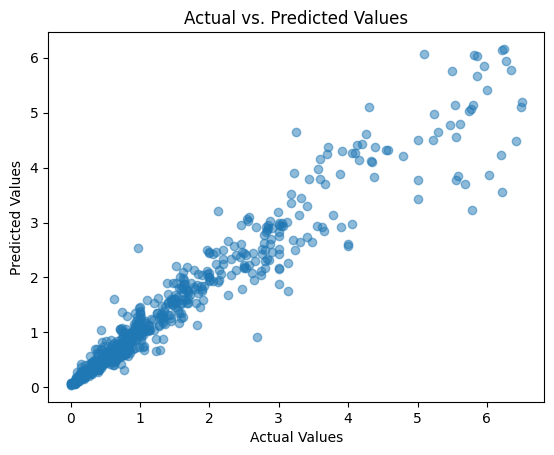

In [25]:
import matplotlib.pyplot as plt
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
mape = mean_absolute_percentage_error(y_test, test_predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.20841947960790289
Mean Squared Error (MSE): 0.151167236316427
Root Mean Squared Error (RMSE): 0.3888023100708469
R-squared (R2): 0.9254802560794017
